# Imports and install Libs

In [1]:
import unified_ar as ar
ar.reload()
import os
while "datasets" not in os.listdir():
    os.chdir("..")
# import unified_ar.general.libinstall
from unified_ar.constants import methods
import pandas as pd
import numpy as np
from ipywidgets import interact,interact_manual

2023-11-20 11:08:31.535976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 11:08:38.399167: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 11:08:38.404632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 11:09:06.540398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please install GPU version of TF
Please install GPU version of TF


2023-11-20 11:09:43.806260: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-11-20 11:09:43.873407: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Loading Dataset

In [2]:
@interact(dataset={d['method']().data_dscr:i for i,d in enumerate(methods.dataset)})
def dataset_select(dataset=0):
    global datasetdscr
    datasetdscr=methods.dataset[dataset]['method']().load()
    # datasetdscr = methods.dataset[2m]['method']().load()
    print(f'dataset {datasetdscr.data_dscr} loaded')
    datasetdscr.activities_map

interactive(children=(Dropdown(description='dataset', options={'Home1': 0, 'Home2': 1, 'Aruba': 2, 'KaryoAdlNo…

In [5]:
datasetdscr.activity_events['Activity'].value_counts().to_dict()['1']

KeyError: '1'

# Visualize DataSet

In [ ]:
import unified_ar as ar
ar.reload()
from unified_ar.datatool import dataset_viewer as dv

dv.displaycontent(datasetdscr)


In [ ]:
ar.reload()

# for act in datasetdscr.activities_map:
# 	result_analyse.dataset_viewer.view(datasetdscr,act)
dv.sensor_hitmap(datasetdscr)
print('sensor hitmap on begin, middle and end')

In [ ]:
ar.reload()
# for act in datasetdscr.activities_map:
dv.plotAct(datasetdscr,datasetdscr.activity_events)

# Train Test Builder

In [3]:
ar.reload()
evalmethod=ar.evaluation.SplitEval.SplitEval()
evalmethod.dataset=datasetdscr
Train,Test=evalmethod.makeTrainTest(datasetdscr.sensor_events,datasetdscr.activity_events)
Train.acts=list(datasetdscr.activities_map.keys())
Test.acts=list(datasetdscr.activities_map.keys())
Train.act_map=datasetdscr.activities_map
Test.act_map=datasetdscr.activities_map

Please install GPU version of TF


2023-11-20 11:09:59.099395: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/users/modaresi/unified_ar/unified_ar/evaluation/SplitEval.py:33: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  test_end = pd.to_datetime('1249337628', unit='s')


# PreProcessing

In [4]:
ar.reload()
preprocessing=methods.preprocessing[0]['method']()
TrainData=preprocessing.process(datasetdscr,Train)
TestData=preprocessing.process(datasetdscr,Test)

Please install GPU version of TF


2023-11-20 11:10:05.414557: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Segmentation

In [5]:
ar.reload()
methods=ar.constants.methods
@interact_manual(segmentation={v['method']().shortname() + ' ' + (str(v['params']) if 'params' in v and len(v['params']) > 0 else ''): k for k, v in enumerate(methods.segmentation)})
def segmentation_process(segmentation=0):
    global Strain,Stest
    # utils.reload()
    prepare_segment2=ar.segmentation.segmentation_abstract.prepare_segment2
    func=ar.Data('func');func.ui_debug={'seg':1};segindx=segmentation
    func.acts=TrainData.acts
    func.segmentor=methods.segmentation[segindx]['method']()
    func.segmentor.applyDefParams(methods.segmentation[segindx]['params'])
    func.activityFetcher=methods.activity_fetcher[0]['method']()  
    Strain=prepare_segment2(func,TrainData,datasetdscr,train=True)
    Stest=prepare_segment2(func,TestData,datasetdscr,train=False)
    print('Segmentation Finished %d Train segment %d Test segment created %s' % (len(Strain.set_window),len(Stest.set_window), func.segmentor.shortname()))

Please install GPU version of TF


2023-11-20 11:10:11.287576: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


interactive(children=(Dropdown(description='segmentation', options={"FixedEventWindow [{'size': 15, 'range': […

# Meta Dataset: only available for SWMeta 

In [ ]:
# meta_dataset=utils.loadState(f'meta_dataset/{methods.run_names["out"]}_0')
# import unified_ar.general.utils as utils
# import pandas as pd
# meta_dataset=utils.loadState(f'meta_dataset/220816_08-30-22-Home1-s=1 0')
# meta_dataset['meta_targets']=pd.DataFrame(meta_dataset['meta_targets'])
# meta_dataset['meta_features']=pd.DataFrame(meta_dataset['meta_features'])
display(meta_dataset['meta_features'])
display(meta_dataset['meta_targets'])

# Feature Extraction

In [55]:
# ar.reload()
@interact_manual(feature_ex={v['method']().shortname() + ' ' + (str(v['params']) if 'params' in v and len(v['params']) > 0 else ''): k for k, v in  enumerate(methods.feature_extraction)})
def feature_extraction_process(feature_ex=0):
    ar.reload()
    featureExtraction=ar.feature_extraction.feature_abstract.featureExtraction
    feat=methods.feature_extraction[feature_ex]
    featureExtractor=feat['method']()
    featureExtractor.applyDefParams(feat['params'])
    Strain.set=featureExtraction(featureExtractor,datasetdscr,Strain,istrain=True)
    Stest.set =featureExtraction(featureExtractor,datasetdscr,Stest,istrain=False)
    print('FeatureExtraction Finished train shape %s , test shape %s , %s' % (str(Strain.set.shape),str(Stest.set.shape), featureExtractor.shortname()))


interactive(children=(Dropdown(description='feature_ex', options={"SensorWord [{'vocab_size': 1000}]": 0, "Rec…

# Feature Importance 
(not usable for SensorWord)

In [ ]:
def plotFeatureImportance(dataset):
	from sklearn.ensemble import ExtraTreesClassifier
	import matplotlib.pyplot as plt
	X=pd.DataFrame(dataset.set)
	y=dataset.label
	model = ExtraTreesClassifier()
	model.fit(X,y)
	# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
	#plot graph of feature importances for better visualization
	feat_importances = pd.Series(model.feature_importances_, index=X.columns)
	feat_importances.nlargest(20).plot(kind='barh')
	plt.show()

print('important feature in train set')
plotFeatureImportance(Strain)
print('without cheating it should be similar in test set')
plotFeatureImportance(Stest)

# Features Correlation 
(not usable for SensorWord)

In [ ]:
import matplotlib.pyplot as plt
def dataCorr(dataset):
	import seaborn as sns
	data=pd.DataFrame(dataset.set)
	corrmat = data.corr()
	top_corr_features = corrmat.index
	plt.figure(figsize=(20,20))
	#plot heat map
	g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
	plt.show()

print('data correlation in train set')
dataCorr(Strain)
print('without cheating, it should be similar, data correlation in test set')
dataCorr(Stest)

# Classifier

In [7]:
ar.reload()
@interact_manual(classifier_method={d['method']().shortname():i for i,d in enumerate(methods.classifier)})
def segmentation_process(classifier_method=0):
	global classifier	
	cmethod=classifier_method
	classifier=methods.classifier[cmethod]['method']()
	classifier.applyDefParams(methods.classifier[cmethod]['params'])
	classifier.createmodel(Strain.set[0].shape,len(Strain.acts),update_model=0)
	classifier.setWeight(None)
	print('Classifier model created  %s' % (classifier.shortname()))
	classifier.train(Strain.set, Strain.label) 
	print('Classifier model trained  %s' % (classifier.shortname()))

Please install GPU version of TF


2023-11-20 11:10:31.244393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


interactive(children=(Dropdown(description='classifier_method', options={'FCN': 0, 'FCNEmbedded': 1, 'Liciotti…

# Results

In [50]:
train_predicted        =classifier.predict(Strain.set)
train_predicted_classes=classifier.predict_classes(Strain.set)    

test_predicted        =classifier.predict(Stest.set)
test_predicted_classes=classifier.predict_classes(Stest.set)


shape (5826, 50)
shape (5826, 50)
shape (1061, 50)
shape (1061, 50)


# display classic metrics

Please install GPU version of TF
[12:48:41] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f57d6ad6ac0>
train weighted avg {'accuracy': 0.9763, 'precision': 0.9766, 'recall': 0.9763, 'f1': 0.9764}
train micro avg {'accuracy': 0.9763, 'precision': 0.9763, 'recall': 0.9763, 'f1': 0.9763}
train macro avg {'accuracy': 0.9763, 'precision': 0.9556, 'recall': 0.9608, 'f1': 0.9581}
[12:48:41] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f57ed6cb2e0>
test weighted avg {'accuracy': 0.8812, 'precision': 0.8753, 'recall': 0.8812, 'f1': 0.8733}
test micro avg {'accuracy': 0.8812, 'precision': 0.8812, 'recall': 0.8812, 'f1': 0.8812}
test macro avg {'accuracy': 0.8812, 'precision': 0.7553, 'recall': 0.735, 'f1': 0.7327}


2023-11-20 12:48:41.509695: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


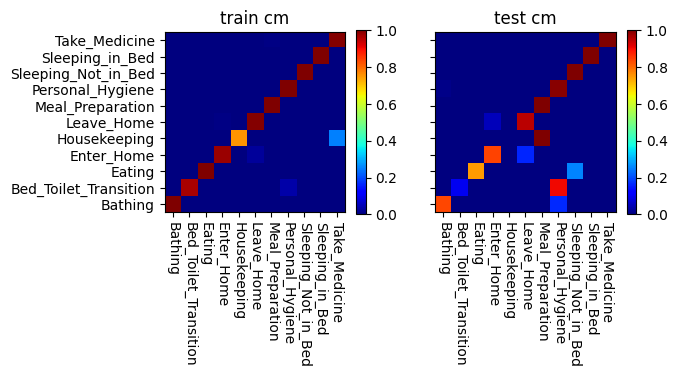

In [51]:
ar.reload()
from matplotlib.pylab import plt
import unified_ar.result_analyse.visualisation as vs
from unified_ar.metric.CMbasedMetric import CMbasedMetric
from sklearn.metrics  import confusion_matrix

train_cm=confusion_matrix(Strain.label,train_predicted_classes)
test_cm=confusion_matrix(Stest.label,test_predicted_classes)
activities=datasetdscr.activities
remove_none=False
if remove_none:
    train_cm=train_cm[1:,1:]
    test_cm=test_cm[1:,1:]
    activities=datasetdscr.activities[1:]

fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train weighted avg',CMbasedMetric(train_cm,'weighted'));
print('train micro avg',CMbasedMetric(train_cm,'micro'));
print('train macro avg',CMbasedMetric(train_cm,'macro'));



vs.plot_CM_normal(test_cm,datasetdscr.activities,title='test cm',ax=axs[1])
print('test weighted avg',CMbasedMetric(test_cm,'weighted'));
print('test micro avg',CMbasedMetric(test_cm,'micro'));
print('test macro avg',CMbasedMetric(test_cm,'macro'));
        

# Combiner

Please install GPU version of TF
train events merged  EmptyCombiner2
test events merged  EmptyCombiner2
visualizing real and pred1


2023-11-20 12:48:52.932803: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


visualizing real and pred1


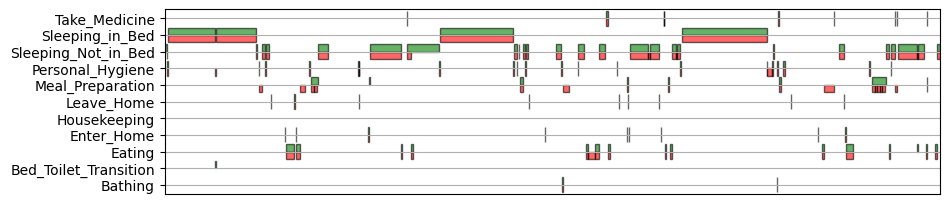

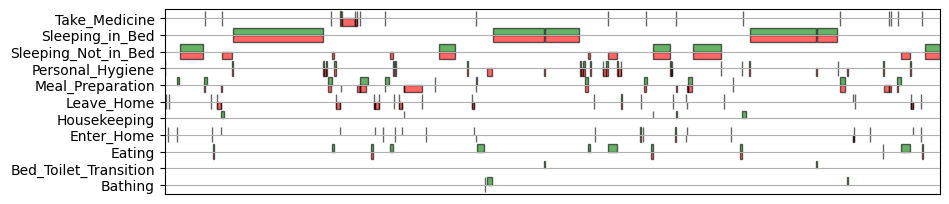

In [52]:
ar.reload()
import unified_ar.combiner.SimpleCombiner
combiner=methods.combiner[0]['method']()
combiner.applyDefParams(methods.combiner[0]['params'])
train_pred_events      =combiner.combine(Strain.s_event_list,Strain.set_window,train_predicted)
print('train events merged  %s' % (combiner.shortname()))
test_pred_events      =combiner.combine(Stest.s_event_list,Stest.set_window,test_predicted)
print('test events merged  %s' % (combiner.shortname()))
import unified_ar.result_analyse.visualisation as vs

vs.plot_joint_events(datasetdscr, Train.a_events, train_pred_events)
vs.plot_joint_events(datasetdscr, Test.a_events, test_pred_events)

# TS CM

Please install GPU version of TF


2023-11-20 12:49:00.944449: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[12:49:01] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f582967cc70>
train weighted avg {'accuracy': 0.91, 'precision': 0.8673, 'recall': 0.91, 'f1': 0.8852}
train micro avg {'accuracy': 0.91, 'precision': 0.91, 'recall': 0.91, 'f1': 0.91}
train macro avg {'accuracy': 0.91, 'precision': 0.6908, 'recall': 0.89, 'f1': 0.7633}
[12:49:01] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f587d168cd0>
test weighted avg {'accuracy': 0.7693, 'precision': 0.7782, 'recall': 0.7693, 'f1': 0.7624}
test micro avg {'accuracy': 0.7693, 'precision': 0.7693, 'recall': 0.7693, 'f1': 0.7693}
test macro avg {'accuracy': 0.7693, 'precision': 0.4839, 'recall': 0.5863, 'f1': 0.4787}


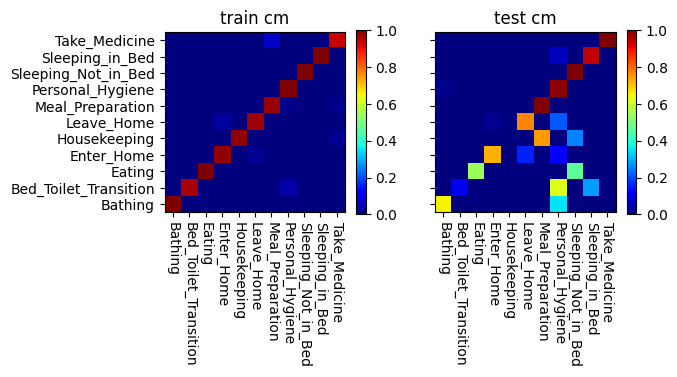

In [53]:
ar.reload()
from unified_ar.metric.CMbasedMetric import CMbasedMetric
from unified_ar.metric.event_confusion_matrix import event_confusion_matrix

train_event_cm     = event_confusion_matrix(Strain.a_events,train_pred_events,datasetdscr.activities)
test_event_cm      = event_confusion_matrix(Stest.a_events,test_pred_events,datasetdscr.activities)

activities=datasetdscr.activities
if remove_none:
    train_event_cm=train_event_cm[1:,1:]
    test_event_cm=test_event_cm[1:,1:]
    activities=datasetdscr.activities[1:]

    
fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_event_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train weighted avg',CMbasedMetric(train_event_cm,'weighted'));
print('train micro avg',CMbasedMetric(train_event_cm,'micro'));
print('train macro avg',CMbasedMetric(train_event_cm,'macro'));

vs.plot_CM_normal(test_event_cm,activities,title='test cm',ax=axs[1])
print('test weighted avg',CMbasedMetric(test_event_cm,'weighted'));
print('test micro avg',CMbasedMetric(test_event_cm,'micro'));
print('test macro avg',CMbasedMetric(test_event_cm,'macro'));




Please install GPU version of TF
{'method': {0: {'test': <unified_ar.common.data.Data object at 0x7f57ed637dc0>}}}


2023-11-20 12:49:08.865458: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


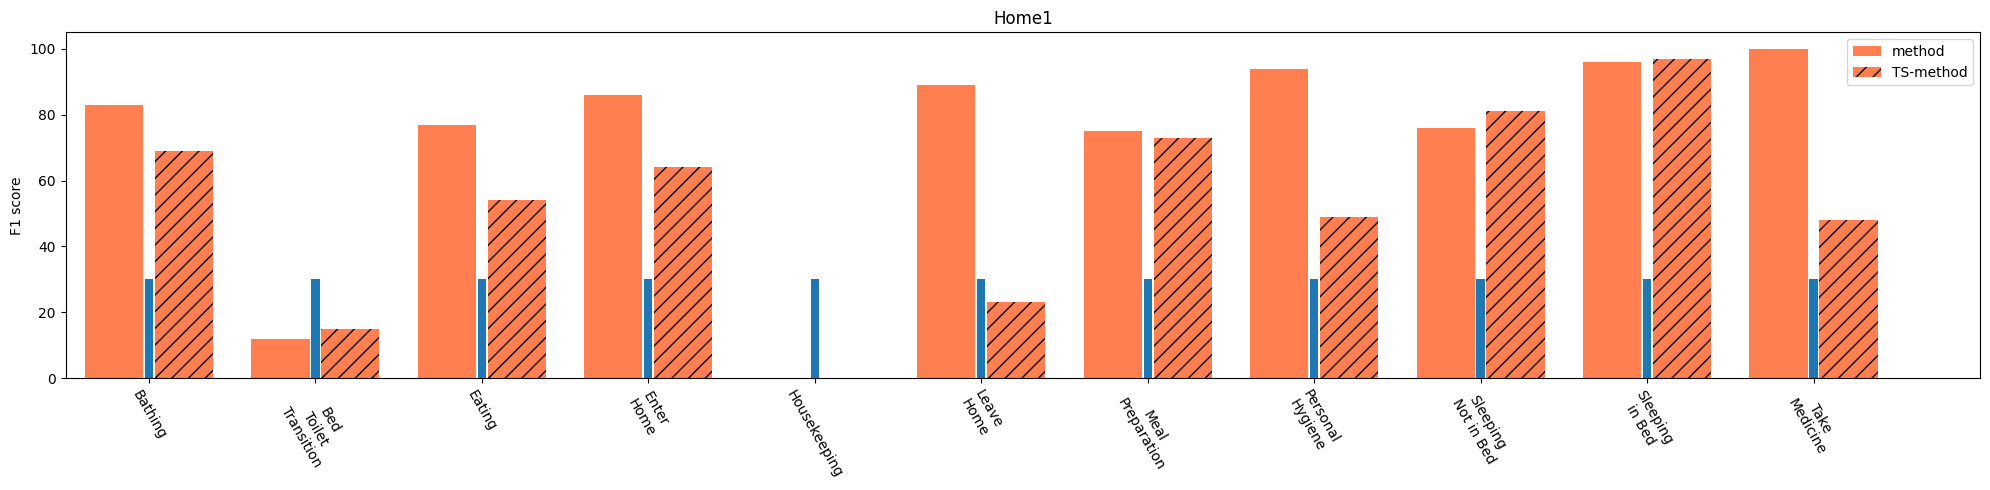

In [54]:
ar.reload()
import unified_ar.result_analyse.visualisation as vs


# vs.plot_per_act_cm(datasetdscr,train_cm,train_event_cm)
# import matplotlib.pyplot as plt
# plt.show()
vs.plot_per_act_cm(datasetdscr,test_cm,test_event_cm)